<a href="https://www.kaggle.com/code/klyushnik/kears-multi-class-task?scriptVersionId=168292645" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e2/sample_submission.csv
/kaggle/input/playground-series-s4e2/train.csv
/kaggle/input/playground-series-s4e2/test.csv


# Come in https://www.kaggle.com/code/klyushnik/xx-ensemble-multiclass-xxx

# Load data 

In [2]:
train = pd.read_csv('/kaggle/input/playground-series-s4e2/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e2/test.csv')

print('Shape train is', train.shape, 'shape test is', test.shape)

Shape train is (20758, 18) shape test is (13840, 17)


In [3]:
train.describe()

id           Age        Height        Weight          FCVC  \
count  20758.00000  20758.000000  20758.000000  20758.000000  20758.000000   
mean   10378.50000     23.841804      1.700245     87.887768      2.445908   
std     5992.46278      5.688072      0.087312     26.379443      0.533218   
min        0.00000     14.000000      1.450000     39.000000      1.000000   
25%     5189.25000     20.000000      1.631856     66.000000      2.000000   
50%    10378.50000     22.815416      1.700000     84.064875      2.393837   
75%    15567.75000     26.000000      1.762887    111.600553      3.000000   
max    20757.00000     61.000000      1.975663    165.057269      3.000000   

                NCP          CH2O           FAF           TUE  
count  20758.000000  20758.000000  20758.000000  20758.000000  
mean       2.761332      2.029418      0.981747      0.616756  
std        0.705375      0.608467      0.838302      0.602113  
min        1.000000      1.000000      0.000000      0.000000  
25%        3.000000      1.792022      0.008013      0.000000  
50%        3.000000      2.000000      1.000000      0.573887  
75%        3.000000      2.549617      1.587406      1.000000  
max        4.000000      3.000000      3.000000      2.000000

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [5]:
train.head()

id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesdad  
0  0.976473  Sometimes  Public_Transportation  Overweight_Level_II  
1  1.000000         no             Automobile        Normal_Weight  
2  1.673584         no  Public_Transportation  Insufficient_Weight  
3  0.780199  Sometimes  Public_Transportation     Obesity_Type_III  
4  0.931721  Sometimes  Public_Transportation  Overweight_Level_II

In [6]:
test.head()

id  Gender        Age    Height      Weight  \
0  20758    Male  26.899886  1.848294  120.644178   
1  20759  Female  21.000000  1.600000   66.000000   
2  20760  Female  26.000000  1.643355  111.600553   
3  20761    Male  20.979254  1.553127  103.669116   
4  20762  Female  26.000000  1.627396  104.835346   

  family_history_with_overweight FAVC      FCVC       NCP       CAEC SMOKE  \
0                            yes  yes  2.938616  3.000000  Sometimes    no   
1                            yes  yes  2.000000  1.000000  Sometimes    no   
2                            yes  yes  3.000000  3.000000  Sometimes    no   
3                            yes  yes  2.000000  2.977909  Sometimes    no   
4                            yes  yes  3.000000  3.000000  Sometimes    no   

       CH2O SCC       FAF       TUE       CALC                 MTRANS  
0  2.825629  no  0.855400  0.000000  Sometimes  Public_Transportation  
1  3.000000  no  1.000000  0.000000  Sometimes  Public_Transportation  
2  2.621877  no  0.000000  0.250502  Sometimes  Public_Transportation  
3  2.786417  no  0.094851  0.000000  Sometimes  Public_Transportation  
4  2.653531  no  0.000000  0.741069  Sometimes  Public_Transportation

In [7]:
for col in train.columns:
    pct_missing = np.mean(train[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id - 0%
Gender - 0%
Age - 0%
Height - 0%
Weight - 0%
family_history_with_overweight - 0%
FAVC - 0%
FCVC - 0%
NCP - 0%
CAEC - 0%
SMOKE - 0%
CH2O - 0%
SCC - 0%
FAF - 0%
TUE - 0%
CALC - 0%
MTRANS - 0%
NObeyesdad - 0%


In [8]:
train = train.drop(columns = ['id', 'SMOKE', 'SCC'], axis =1)
test = test.drop(columns = ['id', 'SMOKE', 'SCC'], axis =1)

print('Shape train is', train.shape, 'shape test is', test.shape)

Shape train is (20758, 15) shape test is (13840, 14)


In [9]:
num_rows = len(train.index)
low_information_cols = [] #

for col in train.columns:
    cnts = train[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

In [10]:
print('There is no duplicates:')

train_1= train.drop_duplicates()

print(train_1.shape)
print(train.shape)

There is no duplicates:
(20749, 15)
(20758, 15)


# Profile report

In [11]:
# !pip install ydata-profiling
from ydata_profiling import ProfileReport

ProfileReport(train, title="Profiling Report")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Pre-process

In [12]:
from sklearn.preprocessing import LabelEncoder

object_list = test.select_dtypes(include=('object')).columns
print('Object columns to hot:',object_list)

numetric_list = test.select_dtypes(include=('int', 'float')).columns
print('Numetric columns:',numetric_list)

target_mapping = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6}

le = LabelEncoder()
train['NObeyesdad'] = le.fit_transform((train['NObeyesdad']).map(target_mapping))

for i in object_list:
    train[i] = le.fit_transform(train[i])
    test[i] = le.fit_transform(test[i])
    
print('Shape train is', train.shape, 'shape test is', test.shape)
print('Now all types int,float:',train.select_dtypes(include=('object')).columns)

Object columns to hot: Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'CALC',
       'MTRANS'],
      dtype='object')
Numetric columns: Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')
Shape train is (20758, 15) shape test is (13840, 14)
Now all types int,float: Index([], dtype='object')


In [13]:
X = train.drop(columns = ['NObeyesdad'],axis =1)
y = train.NObeyesdad
X_total = test
print('Shape X is', X.shape, ', shape y is', y.shape, ', shape X_total is', X_total.shape)

Shape X is (20758, 14) , shape y is (20758,) , shape X_total is (13840, 14)


# New data

In [14]:
from sklearn.base import BaseEstimator, TransformerMixin
from category_encoders import OneHotEncoder, OrdinalEncoder, CountEncoder

In [15]:
class AggFeatureExtractor(BaseEstimator, TransformerMixin):
    
    def __init__(self, group_col, agg_col, agg_func):
        self.group_col = group_col
        self.group_col_name = ''
        for col in group_col:
            self.group_col_name += col
        self.agg_col = agg_col
        self.agg_func = agg_func
        self.agg_df = None
        self.medians = None
        
    def fit(self, X, y=None):
        group_col = self.group_col
        agg_col = self.agg_col
        agg_func = self.agg_func
        
        self.agg_df = X.groupby(group_col)[agg_col].agg(agg_func)
        self.agg_df.columns = [f'{self.group_col_name}_{agg}_{_agg_col}' for _agg_col in agg_col for agg in agg_func]
        self.medians = X[agg_col].median()
        
        return self
    
    def transform(self, X):
        group_col = self.group_col
        agg_col = self.agg_col
        agg_func = self.agg_func
        agg_df = self.agg_df
        medians = self.medians
        
        X_merged = pd.merge(X, agg_df, left_on=group_col, right_index=True, how='left')
        X_merged.fillna(medians, inplace=True)
        X_agg = X_merged.loc[:, [f'{self.group_col_name}_{agg}_{_agg_col}' for _agg_col in agg_col for agg in agg_func]]
        
        return X_agg
    
    def fit_transform(self, X, y=None):
        self.fit(X, y)
        X_agg = self.transform(X)
        return X_agg

In [16]:
class Preprocessor:
    def __init__(self, agg_col, agg_func, group_cols):
        self.agg_col = agg_col
        self.agg_func = agg_func
        self.group_cols = group_cols
        
    def preprocess(self, X, X_total):    
        agg_train, agg_test = [], []
        for group_col in self.group_cols:
            agg_extractor = AggFeatureExtractor(group_col=group_col, agg_col=self.agg_col, agg_func=self.agg_func)
            agg_extractor.fit(pd.concat([X, X_total], axis=0))
            agg_train.append(agg_extractor.transform(X))
            agg_test.append(agg_extractor.transform(X_total))
        X = pd.concat([X] + agg_train, axis=1)
        X_total = pd.concat([X_total] + agg_test, axis=1)
        
        X = X.fillna(0)
        X_total = X_total.fillna(0)
        return X, X_total   

In [17]:
agg_col = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

agg_func = ['mean', 'std']
group_cols = [['Age'], ['Height'], ['Weight'],
              ['Height', 'Weight'], ['Age', 'Weight'],
              ['Age','NCP'],['Height','CH2O'],
              ['FCVC', 'NCP'], ['CH2O', 'FAF'], 
              ['FCVC', 'FAF'], ['FAF', 'TUE'],
              ['CH2O', 'FAF', 'TUE']]

pp = Preprocessor(agg_col, agg_func, group_cols)
X, X_total = pp.preprocess(X, X_total)

print(f"X shape :{X.shape} , y shape :{y.shape}")
print(f"X_test shape :{X_total.shape}")

X shape :(20758, 206) , y shape :(20758,)
X_test shape :(13840, 206)


In [18]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn import preprocessing

transform = PowerTransformer(method='yeo-johnson')
transform2 = QuantileTransformer(n_quantiles=10, random_state=0)

for i in numetric_list:
    X[i+'+log'] = (X[i]+1).transform(np.log)
    X_total[i+'+log'] =(X_total[i]+1).transform(np.log)
    
    X[i+'+log1'] = (X[i]+1).transform(np.log1p)
    X_total[i+'+log1'] =(X_total[i]+1).transform(np.log1p)
    
    X[i+'+y_j'] = transform.fit_transform(X[[i]])
    X_total[i+'+y_j'] = transform.fit_transform(X_total[[i]])
    
    X[i+'+q_t'] = transform2.fit_transform(X[[i]])
    X_total[i+'+q_t'] = transform2.fit_transform(X_total[[i]])
       
    X[i+'+sqrt'] = (X[i]+1).transform(np.sqrt)
    X_total[i+'+sqrt'] =(X_total[i]+1).transform(np.sqrt)
    

print('Shape X =', X.shape,',',"Shape X_total =", X_total.shape)

Shape X = (20758, 246) , Shape X_total = (13840, 246)


In [19]:
X['BMI'] = X['Weight'] / (X['Height'] ** 2)
X_total['BMI'] = X_total['Weight'] / (X_total['Height'] ** 2)

X['Meal_Habits'] = X['FCVC'] * X['NCP']
X_total['Meal_Habits'] = X_total['FCVC'] * X_total['NCP']

X['Tech_Usage_Score'] = X['TUE'] / X['Age']
X_total['Tech_Usage_Score'] = X_total['TUE'] / X_total['Age']

print('Shape X is', X.shape, ', shape y is', y.shape, ', shape X_total is', X_total.shape)

Shape X is (20758, 249) , shape y is (20758,) , shape X_total is (13840, 249)


# Polynomial Features

In [20]:
def PolynomialFeatures_labeled(input_df,power):
   
    poly = preprocessing.PolynomialFeatures(power)
    output_nparray = poly.fit_transform(input_df)
    powers_nparray = poly.powers_

    input_feature_names = list(input_df.columns)
    target_feature_names = ["Constant Term"]
    for feature_distillation in powers_nparray[1:]:
        intermediary_label = ""
        final_label = ""
        for i in range(len(input_feature_names)):
            if feature_distillation[i] == 0:
                continue
            else:
                variable = input_feature_names[i]
                power = feature_distillation[i]
                intermediary_label = "%s+%d" % (variable,power)
                if final_label == "":         #If the final label isn't yet specified
                    final_label = intermediary_label
                else:
                    final_label = final_label + "x" + intermediary_label
        target_feature_names.append(final_label)
    output_df = pd.DataFrame(output_nparray, columns = target_feature_names)
    return output_df

output_df = PolynomialFeatures_labeled(X[numetric_list],2)
output_df_t = PolynomialFeatures_labeled(X_total[numetric_list],2)

X =  pd.concat([X.reset_index(drop=True), output_df], axis = 1)
X_total = pd.concat([X_total.reset_index(drop=True), output_df_t], axis = 1)

print('Shape X =', X.shape,',',"Shape X_total =", X_total.shape)

Shape X = (20758, 294) , Shape X_total = (13840, 294)


In [21]:
X = X.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
X_total = X_total.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

print('Shape X =', X.shape,',',"Shape X_total =", X_total.shape)

Shape X = (20758, 294) , Shape X_total = (13840, 294)


# Threshold

In [22]:
from sklearn.feature_selection import VarianceThreshold
def variance_threshold(df,th):
    var_thres=VarianceThreshold(threshold=th)
    var_thres.fit(df)
    new_cols = var_thres.get_support()
    return df.iloc[:,new_cols]

In [23]:
X = variance_threshold(X,0)
list_name = (X.columns)
X_total = X_total[list_name]

print('Shape test =', X_total.shape)
print('Shape train =', X.shape)

Shape test = (13840, 271)
Shape train = (20758, 271)


# PCA

In [24]:
from sklearn.decomposition import PCA

In [25]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalComponents_test = pca.fit_transform(X_total)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDftest = pd.DataFrame(data = principalComponents_test
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([train, principalDf], axis = 1)
test = pd.read_csv('/kaggle/input/playground-series-s4e2/test.csv')
test = test.drop(columns = ['id','SMOKE', 'SCC'], axis =1)
finalDftest = pd.concat([test, principalDftest], axis = 1)
print('Shape train is',finalDf.shape,'Shape test is',finalDftest.shape)

Shape train is (20758, 17) Shape test is (13840, 16)


In [26]:
for i in object_list:
    finalDftest[i] = le.fit_transform(finalDftest[i])
    
print('Now all types int,float:',finalDftest.select_dtypes(include=('object')).columns)

Now all types int,float: Index([], dtype='object')


In [27]:
X = finalDf.drop(columns = ['NObeyesdad'],axis =1)
y = finalDf.NObeyesdad
X_total = finalDftest
print('Shape X is', X.shape, ', shape y is', y.shape, ', shape X_total is', X_total.shape)

Shape X is (20758, 16) , shape y is (20758,) , shape X_total is (13840, 16)


# SMOTE

In [28]:
# from imblearn.over_sampling import SMOTE

# oversample = SMOTE(sampling_strategy='auto', random_state=42)

# X, y = oversample.fit_resample(X, y)

# print('Shape X is', X.shape, ', shape y is', y.shape, ', shape X_total is', X_total.shape)

# StandardScaler

In [29]:
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

mix = MinMaxScaler()
X = mix.fit_transform(X)
X_total = mix.fit_transform(X_total)

print('Shape train is', X.shape, 'shape test is', X_total.shape)

Shape train is (20758, 16) shape test is (13840, 16)


# Build Model

In [30]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization,Dropout, Flatten, LSTM
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from tensorflow import keras
import torch.nn as nn

2024-03-22 13:06:43.932925: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-22 13:06:43.933047: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-22 13:06:44.068971: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [31]:
import tensorflow as tf
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver() # TPU detection
except ValueError:
    tpu = None
    gpus = tf.config.experimental.list_logical_devices("GPU")
    
if tpu:
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu,) 
    print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
elif len(gpus) > 1:
    strategy = tf.distribute.MirroredStrategy([gpu.name for gpu in gpus])
    print('Running on multiple GPUs ', [gpu.name for gpu in gpus])
elif len(gpus) == 1:
    strategy = tf.distribute.get_strategy() 
    print('Running on single GPU ', gpus[0].name)
else:
    strategy = tf.distribute.get_strategy() 
    print('Running on CPU')
print("Number of accelerators: ", strategy.num_replicas_in_sync)
from tensorflow.keras.initializers import Constant
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from keras.optimizers import SGD

Running on single GPU  /device:GPU:0
Number of accelerators:  1


In [32]:
from tensorflow.keras import layers

In [33]:
 from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.03, random_state=42)

input_shape = X.shape[1]
print('Size shape of input dim:', input_shape)

y_train = keras.utils.to_categorical(y_train, 7)
y_test = keras.utils.to_categorical(y_test, 7)

Size shape of input dim: 16


In [34]:
# define baseline model
model = Sequential()

model.add(Dense(256, input_dim=input_shape, activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(7, activation='softmax', kernel_initializer = 'glorot_uniform'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               4352      
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 batch_normalization_1 (Bat  (None, 256)               1024      
 chNormalization)                                       

In [35]:
early_stopping = keras.callbacks.EarlyStopping(patience=10,
                                               min_delta=0.001,
                                               restore_best_weights=True,)

reduce_lr = keras.callbacks.ReduceLROnPlateau(factor = 0.001, patience = 10, mode = 'min', verbose = 1,)

model.compile(loss  = 'categorical_crossentropy',
                  metrics  = ['accuracy'],
                  optimizer = keras.optimizers.Adam(learning_rate=0.001))

history = model.fit(X_train, y_train,
                    batch_size=15,
                    epochs=100, 
                    validation_data=(X_test, y_test),
                    callbacks=[reduce_lr,early_stopping])

Epoch 1/100


I0000 00:00:1711112823.503858      79 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1343/1343 [==============================] - 10s 4ms/step - loss: 0.8318 - accuracy: 0.6830 - val_loss: 0.4979 - val_accuracy: 0.8090 - lr: 0.0010
Epoch 2/100
1343/1343 [==============================] - 5s 4ms/step - loss: 0.6436 - accuracy: 0.7411 - val_loss: 0.4357 - val_accuracy: 0.8395 - lr: 0.0010
Epoch 3/100
1343/1343 [==============================] - 5s 4ms/step - loss: 0.5930 - accuracy: 0.7684 - val_loss: 0.4270 - val_accuracy: 0.8395 - lr: 0.0010
Epoch 4/100
1343/1343 [==============================] - 5s 4ms/step - loss: 0.5545 - accuracy: 0.7845 - val_loss: 0.4258 - val_accuracy: 0.8539 - lr: 0.0010
Epoch 5/100
1343/1343 [==============================] - 5s 4ms/step - loss: 0.5328 - accuracy: 0.7928 - val_loss: 0.4154 - val_accuracy: 0.8636 - lr: 0.0010
Epoch 6/100
1343/1343 [==============================] - 6s 4ms/step - loss: 0.5141 - accuracy: 0.8041 - val_loss: 0.4207 - val_accuracy: 0.8523 - lr: 0.0010
Epoch 7/100
1343/1343 [==============================] - 5s 4ms

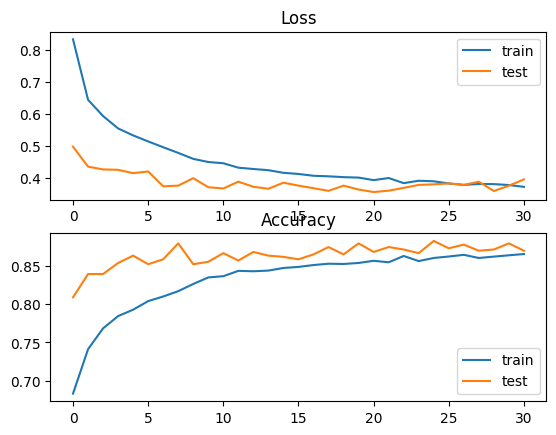

In [36]:
from matplotlib import pyplot

pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

# Predict and submit

In [37]:
import torch

prediction = torch.argmax(torch.FloatTensor(model.predict(X_total)), dim=1)
print(prediction)
revers = {target_mapping[k] : k for k in target_mapping}
print(revers)

sample = pd.read_csv('/kaggle/input/playground-series-s4e2/sample_submission.csv')
sample['NObeyesdad'] = prediction
sample['NObeyesdad'] = sample['NObeyesdad'].map(revers)
sample.to_csv('submission.csv', index=False)
sample.head(10)

433/433 [==============================] - 1s 1ms/step
tensor([5, 2, 6,  ..., 0, 1, 5])
{0: 'Insufficient_Weight', 1: 'Normal_Weight', 2: 'Overweight_Level_I', 3: 'Overweight_Level_II', 4: 'Obesity_Type_I', 5: 'Obesity_Type_II', 6: 'Obesity_Type_III'}


id           NObeyesdad
0  20758      Obesity_Type_II
1  20759   Overweight_Level_I
2  20760     Obesity_Type_III
3  20761       Obesity_Type_I
4  20762     Obesity_Type_III
5  20763  Insufficient_Weight
6  20764  Insufficient_Weight
7  20765   Overweight_Level_I
8  20766  Overweight_Level_II
9  20767        Normal_Weight